In [57]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh


In [59]:
# in your notebook cell
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

# import as usual
import functions

In [58]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
#read csv into data frame fucntion
def read_a_csv(file_path, df_name):
    """
    Read a CSV file and return a DataFrame.

    Args:
        file_path (str): Path to the CSV file.
        df_name (str): Variable name for the DataFrame.

    Returns:
        pandas.DataFrame: DataFrame containing the CSV data.
    """
    try:
        df_name = pd.read_csv(file_path)
        return df_name
    except FileNotFoundError:
        print("Error: File not found.")
        return None

In [11]:
us_videos = read_a_csv('../data/usvideos.csv', 'us_videos')

In [12]:
us_videos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [ ]:
numerics_corr_

In [32]:
#removes non-numeric fields in order to enable correlation by key areas
numerics_only = us_videos.drop(columns=['video_id', 'title', 'channel_title', 'tags', 'thumbnail_link', 'description', 'trending_date', 'category_id'])
numerics_only_by_time = numerics_only.set_index('publish_time')
numerics_only_by_time

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
publish_time,,,,,,,
2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False,False
2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,False,False
2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,False,False
2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,False,False
2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,False,False
...,...,...,...,...,...,...,...
2018-05-18T13:00:04.000Z,1685609,38160,1385,2657,False,False,False
2018-05-18T01:00:06.000Z,1064798,60008,382,3936,False,False,False
2018-05-18T17:34:22.000Z,1066451,48068,1032,3992,False,False,False


In [34]:
corr = numerics_only_by_time.corr()
corr

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
views,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


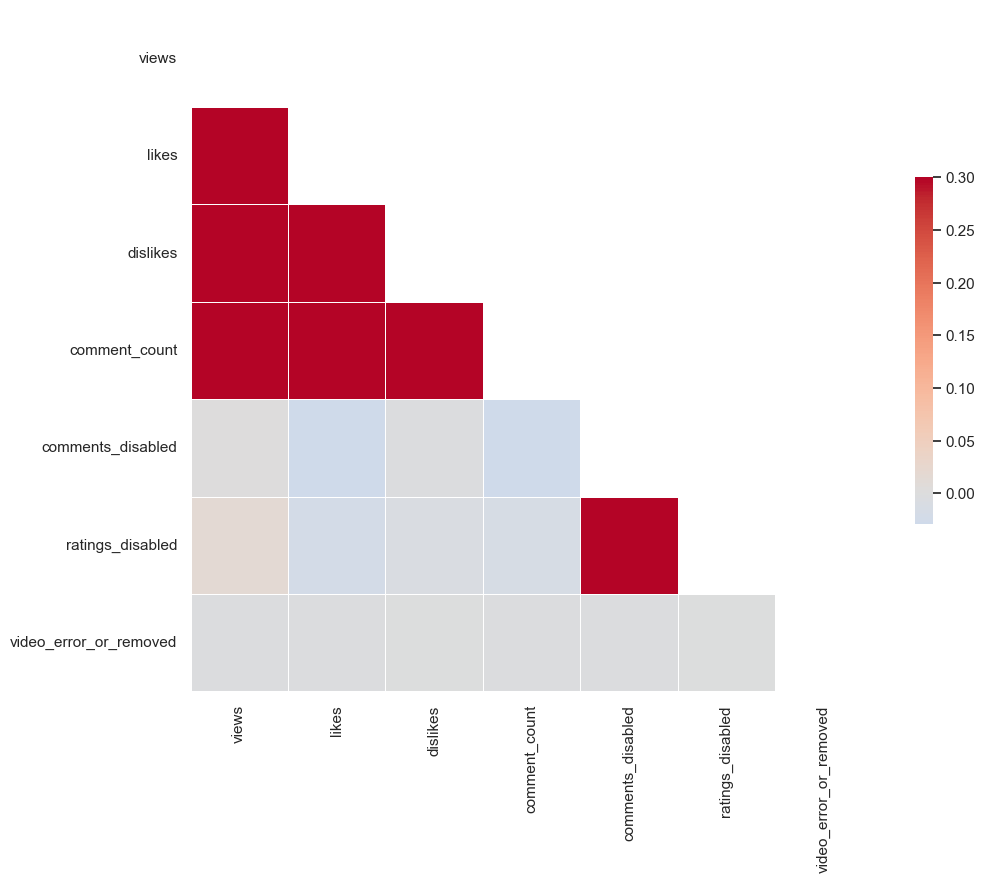

In [33]:
sns.set_theme(style="white")


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [42]:
def describe_dataframe(df):
    """
    Generate descriptive statistics for each numerical column in a Pandas DataFrame.

    Args:
        data (pandas.DataFrame): DataFrame for which to generate descriptive statistics.

    Returns:
        pandas.DataFrame: DataFrame containing descriptive statistics.
    """
    output = df.describe()
    
    return output

In [43]:
describe_dataframe(us_videos)

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [54]:
def describe_dataframe(df):
    """
    Generate descriptive statistics for each numerical column in a Pandas DataFrame.

    Args:
        data (pandas.DataFrame): DataFrame for which to generate descriptive statistics.

    Returns:
        pandas.DataFrame: DataFrame containing descriptive statistics.
    """
    pd.options.display.float_format = '{:,.0f}'.format
    output = df.describe()
    return output

In [55]:
describe_dataframe(us_videos)

,category_id,views,likes,dislikes,comment_count
count,"40,949","40,949","40,949","40,949","40,949"
mean,20,"2,360,785","74,267","3,711","8,447"
std,8,"7,394,114","228,885","29,030","37,430"
min,1,549,0,0,0
25%,17,"242,329","5,424",202,614
50%,24,"681,861","18,091",631,"1,856"
75%,25,"1,823,157","55,417","1,938","5,755"
max,43,"225,211,923","5,613,827","1,674,420","1,361,580"
